## Assessing Credit Risk with Machine Learning Methods

**LendingClub** is a peer-to-peer lending company, currently the worlds largest platform for individuals to both lend and borrow unsecured personal loans. The assignment is to assess the predictive ability of Machine Learning (ML) models to predict defaulters.

The primary goal is to apply ML and business rules to **reduce risk** and **ensure profitability** for LendingClub. 
The assignment provides a large dataset of mortgage data that emulates information required in a mortgage application. The assignment requires a report on the findings of the analysis.

For tractability, the assignment focuses only on a **small set of variables**.

A full description of all the predictors is available in the supplied variable_description.csv file.

The first part of the assignment requires five different class of models to be estimated. We are expected to compare the models to identify the best model to predict default on the LendingClub platform.

### Exercise 1 - Import and clean the data

**Exercise 1** requires us to load the **Data.csv** file as a pandas dataframe on our work environment. We are asked to consider the **'Id'** column as the **index** of the dataframe and to show the **first 10 rows**.

In [1]:
# Start by importing essential libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the csv data using pd.read_csv function, define the 'id' column as the index.
df = pd.read_csv('Data.csv', index_col = 'id')

# Show the first 10 rows.
df.head(10)

loan_amnt  int_rate  installment grade emp_length home_ownership  \
id                                                                     
1       18600     10.99       608.86     B    6 years           RENT   
2        2000     17.97        72.28     D    4 years       MORTGAGE   
3       12000     12.29       400.24     C  10+ years            OWN   
4       16000     19.42       589.90     D    7 years           RENT   
5       22525     16.02       548.01     C  10+ years       MORTGAGE   
6       19000     16.99       472.10     D     1 year           RENT   
7        6000      9.17       191.28     B  10+ years            OWN   
8       17000      5.32       511.96     A  10+ years       MORTGAGE   
9       26375     24.50       766.43     F  10+ years       MORTGAGE   
10      10000     18.45       256.39     D    4 years           RENT   

    annual_inc  loan_status    dti  delinq_2yrs  ...  total_rec_late_fee  \
id                                               ...                       
1     80000.00   Fully Paid  12.92          0.0  ...                 0.0   
2     55400.00      Current  10.62          1.0  ...                 0.0   
3     60000.00   Fully Paid  17.92          0.0  ...                 0.0   
4     64000.00      Current   3.90          1.0  ...                 0.0   
5     94080.00   Fully Paid  19.08          1.0  ...                 0.0   
6     65000.00  Charged Off  15.66          0.0  ...                 0.0   
7    147000.00   Fully Paid   4.00          1.0  ...                 0.0   
8     75000.00      Current   7.89          0.0  ...                 0.0   
9     71596.18   Fully Paid  22.59          0.0  ...                 0.0   
10    48000.00      Current  28.03          0.0  ...                 0.0   

    recoveries  collection_recovery_fee  last_pymnt_amnt  \
id                                                         
1         0.00                   0.0000         15705.09   
2         0.00                   0.0000            72.28   
3         0.00                   0.0000         11281.15   
4         0.00                   0.0000           589.90   
5         0.00                   0.0000         21483.11   
6      1863.64                 335.4552           472.10   
7         0.00                   0.0000           152.92   
8         0.00                   0.0000           511.96   
9         0.00                   0.0000         14426.38   
10        0.00                   0.0000           256.39   

    collections_12_mths_ex_med  application_type  acc_now_delinq  \
id                                                                 
1                          0.0        Individual             0.0   
2                          0.0         Joint App             0.0   
3                          0.0        Individual             0.0   
4                          0.0        Individual             0.0   
5                          0.0        Individual             0.0   
6                          0.0        Individual             0.0   
7                          0.0        Individual             0.0   
8                          0.0        Individual             0.0   
9                          0.0        Individual             0.0   
10                         0.0        Individual             0.0   

    tot_coll_amt  tot_cur_bal  total_rev_hi_lim  
id                                               
1            0.0     170238.0           20700.0  
2           74.0     351452.0           10800.0  
3            0.0      18207.0           20600.0  
4            0.0      12293.0            7800.0  
5          250.0     571244.0           53800.0  
6          234.0      13167.0           24600.0  
7          381.0       2686.0           12400.0  
8            0.0     191633.0           45700.0  
9          510.0     273060.0           19900.0  
10           0.0     132034.0           38100.0  

[10 rows x 31 columns]

## Preliminary Data Exploration and Visualization

I'm curious to see the unique entries and distributions of some of the predictive variables. Before we move on with the assignment I think it could be useful to get an idea of the sort of data we're dealing with.

In [8]:
print(df[['tot_cur_bal', 'loan_amnt', 'int_rate']].describe())

        tot_cur_bal      loan_amnt       int_rate
count  2.189600e+05  226067.000000  226067.000000
mean   1.426342e+05   15057.970978      13.090849
std    1.614333e+05    9177.346912       4.826360
min    0.000000e+00     500.000000       5.310000
25%    2.917875e+04    8000.000000       9.490000
50%    7.963850e+04   12975.000000      12.620000
75%    2.135938e+05   20000.000000      15.990000
max    9.971659e+06   40000.000000      30.990000


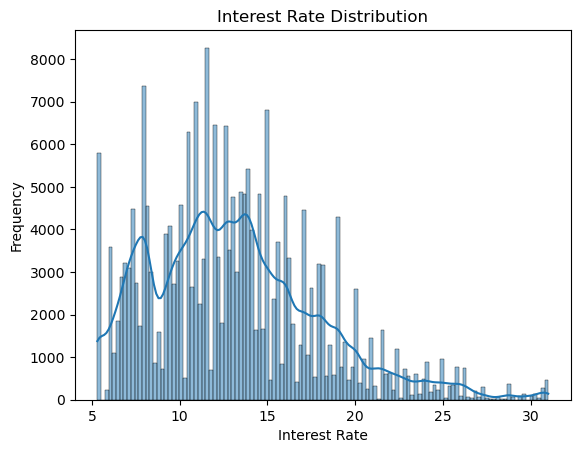

In [9]:
# Plot the distribution of the 'int_rate' column.
sns.histplot(data=df, x='int_rate', kde=True)

# Set axis labels and title.
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.title('Interest Rate Distribution')

# Display the plot.
plt.show()

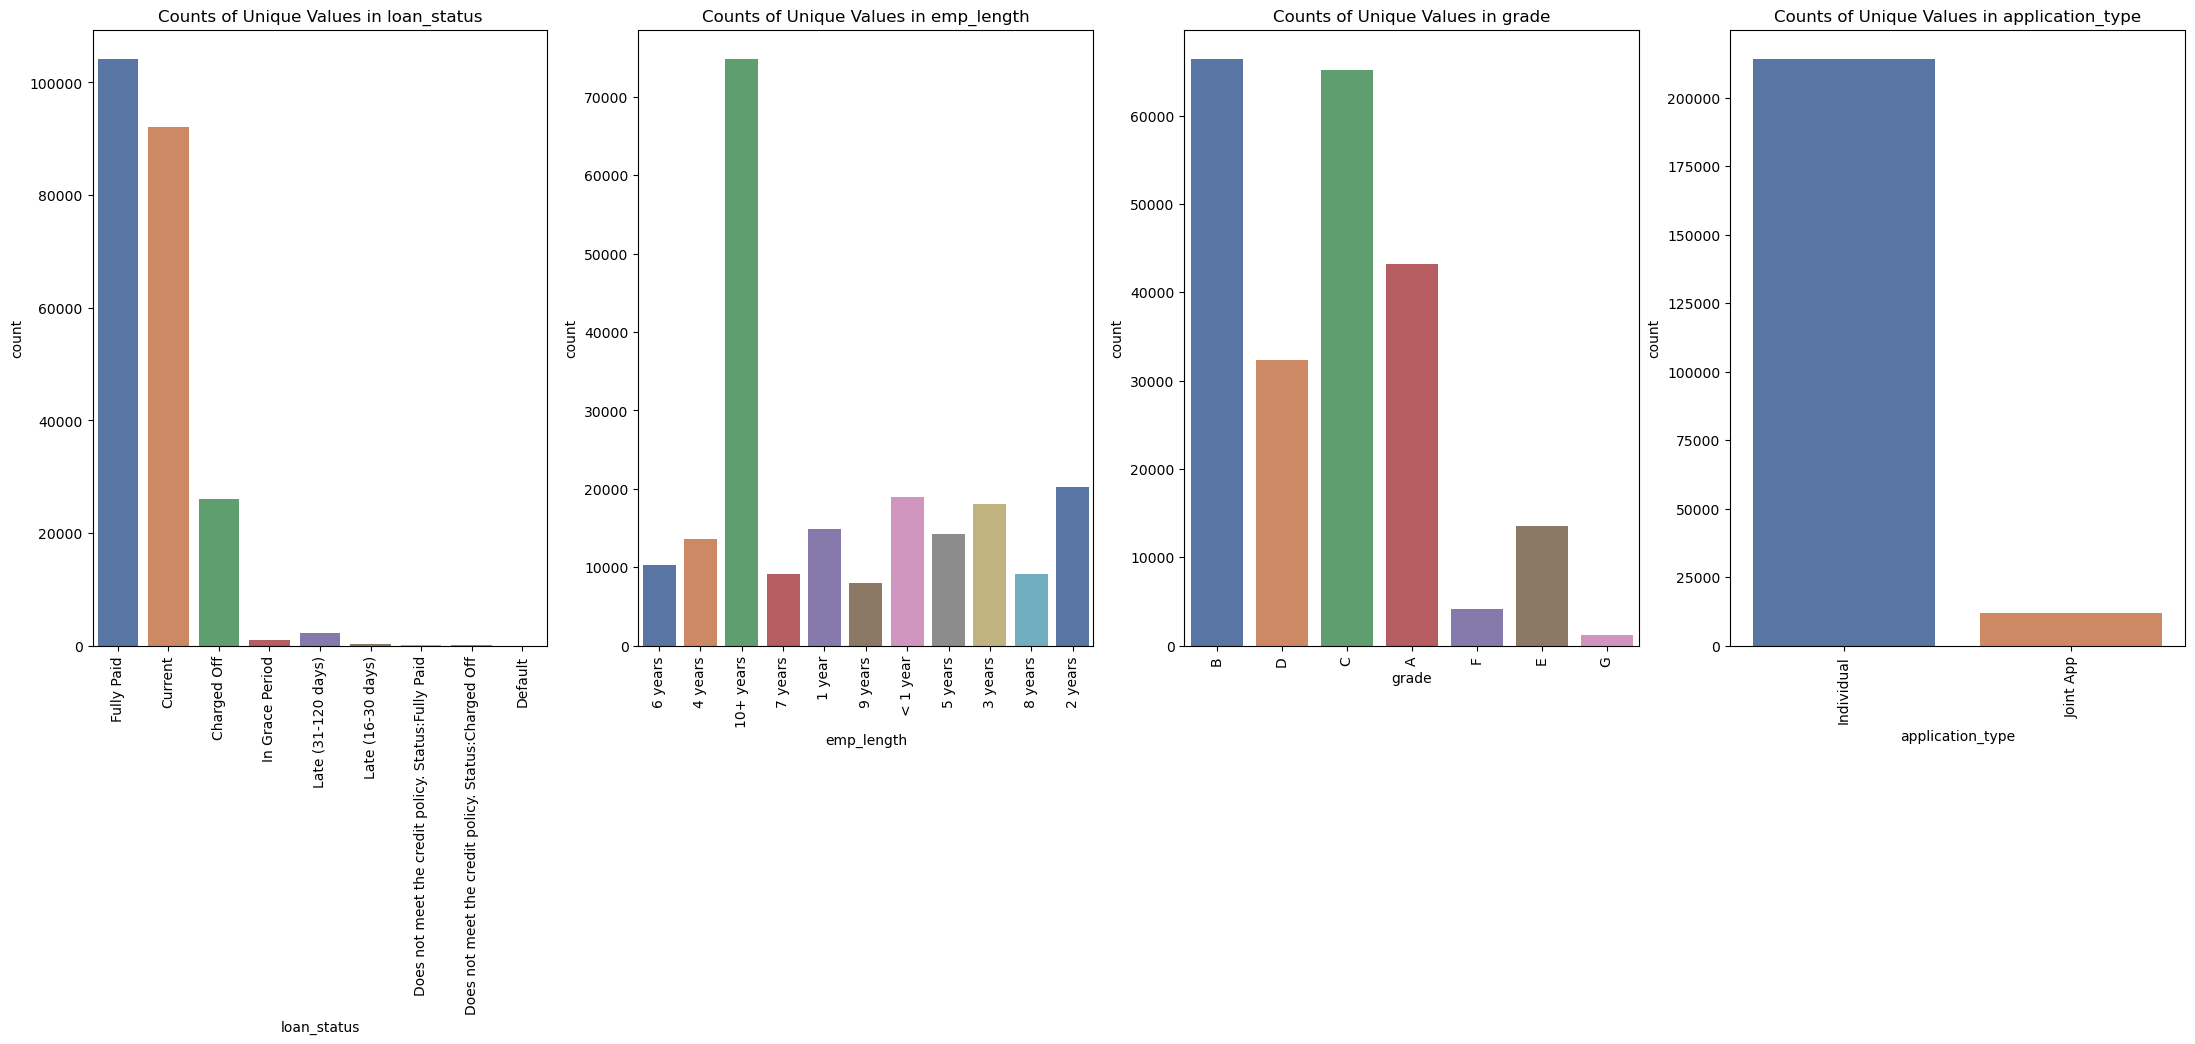

In [11]:
# Creating a list of column names for the plots.
plot_cols = ['loan_status', 'emp_length', 'grade', 'application_type']

# Creating a Figure object and multiple Axes objects.
fig, axes = plt.subplots(1, len(plot_cols), figsize=(27, 8))

# Creating a countplot for each column on a different Axes object
for i, col in enumerate(plot_cols):
    sns.countplot(x=col, data=df, ax=axes[i], palette='deep')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].set_title(f'Counts of Unique Values in {col}')

# display the plots
plt.show()

We were able to quickly gain some insight with the type of data we'll be dealing with. We have a mix of categorical and continuous data-types meaning that we will have to do some conversions. There is also a large gap between the minimum and maximum account balance, meaning there might be a need for standardization. These are good things to keep in mind. Let's move on with the exercises.

## Exercise 2 - Search for missing observations

The variable we want to predict is loan_status. In particular, we want to predict the probability that a mortgage is **Charged Off** from the bank book. Before doing anything, we need to check for the presence of missing data. Notice that the variable **loan_status** is a **categorical variable**.

Our exploratory analysis earlier identified a **similar** variable, named: **Does not meet the credit policy: Status Charged off**. It could be a good idea to design our code to include this variable in the future.

Let's check for missing observations.

In [12]:
# Using the pandas isna() function to search for missing values.
check = df.isna().sum()
check.sum()
# Display the total number of missing observations for each variable.
df.isna().sum()

loan_amnt                          0
int_rate                           0
installment                        0
grade                              0
emp_length                     14611
home_ownership                     0
annual_inc                         0
loan_status                        0
dti                              180
delinq_2yrs                        5
inq_last_6mths                     5
mths_since_last_delinq        115840
open_acc                           5
pub_rec                            5
revol_bal                          0
revol_util                       190
total_acc                          5
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
last_pymnt_amnt                    0
collections_12_mths_ex_med        16
application_type                   0
a

### Exercise 3 - Creating a back-up of the dataframe

The variable **loan_status** does no exhibit any missing values, so we can keep it as is. There are 5 variables with a significant number of missing observations which we should be mindful of.

The exercise requires us to create a back-up copy of the dataframe, so let's proceed.

In [13]:
# Creating a back-up copy of the original dataframe.
df_backup = df

### Exercise 4 - Cleaning the Data

There are some other variable in which do have many *NaN* observations. We should clean the data to make sure there will not be any issue when predicting the mortgages which have been charged off. Let us do the cleaning as follows:

- Step 1: Take out from the dataset those variables in which we have more than 10 missing observations. 
- Step 2: Drop only the missing observations for those variables in which we have less than 10 *NaN*. 

In [14]:
# Step 1: Remove variables with more than 10 missing observations.

# First let's create an object to store the number of missing observations per variable.
num_missing = df.isna().sum()

# Using conditionals to find and store variables with less than 10 missing observations.
columns_to_keep = num_missing[num_missing <= 10].index

# Out of curiosity let's see the variables with more than 10 missing observations.
columns_to_drop = num_missing[num_missing >= 10].index
print(columns_to_drop)

# Let's create another copy of the data frame to store the cleaned version.
df_cleaned = df_backup.loc[:, columns_to_keep]

Index(['emp_length', 'dti', 'mths_since_last_delinq', 'revol_util',
       'collections_12_mths_ex_med', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim'],
      dtype='object')


In [15]:
# Let's see which variables have less than 10 NaN values in the "cleaned" data frame.
df_cleaned.isna().sum()

loan_amnt                  0
int_rate                   0
installment                0
grade                      0
home_ownership             0
annual_inc                 0
loan_status                0
delinq_2yrs                5
inq_last_6mths             5
open_acc                   5
pub_rec                    5
revol_bal                  0
total_acc                  5
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
application_type           0
acc_now_delinq             5
dtype: int64

In [16]:
# Step 2: Drop missing observations for variables with less than 10 NaN.

# Using the dropna() function to drop NaN observations.
df_cleaned = df_cleaned.dropna()

# Check to see if function worked as intended.
df_cleaned.isna().sum()

loan_amnt                  0
int_rate                   0
installment                0
grade                      0
home_ownership             0
annual_inc                 0
loan_status                0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
application_type           0
acc_now_delinq             0
dtype: int64

### Exercise 5 - Creating dummy variables

The variable of interest ***loan_status*** is a categorical variable. In order to run our classification algorithms we need to construct a quantitative (binary) variable which takes value 1 if the loan status is *charged off* and zero otherwise.

In [17]:
# Since we only have two categories we can use the numpy np.where() function.
# Something like:
# dummy = np.where(Y == "Charged Off", 1, 0)
# Would be a more concise way of creating the dummy variables here.

# But let's define a more general function to convert the loan_status to a binary value.
# I suggest a more general function as theres also a:
# Does not meet the credit policy. Status:Charged Off value
# entry for loan_status which we may want to also want to include in the analysis in the future.

def binary_dummy(status):
    if status == 'Charged Off':
        return 1
    else:
        return 0
    
# Apply the function to the loan_status column and creating a new dummy column.
df_cleaned['loan_dummy'] = np.vectorize(binary_dummy)(df_cleaned['loan_status'])

# Test to see if it worked
#df_cleaned.head(25)

### Ex 6 - Data visualization 

Before moving to the model estimation and assessment part, we are asked to create visualizations to look at the **distribution** of the **loan_amnt** and the **int_rate** by borrowers credit score (**grade**).

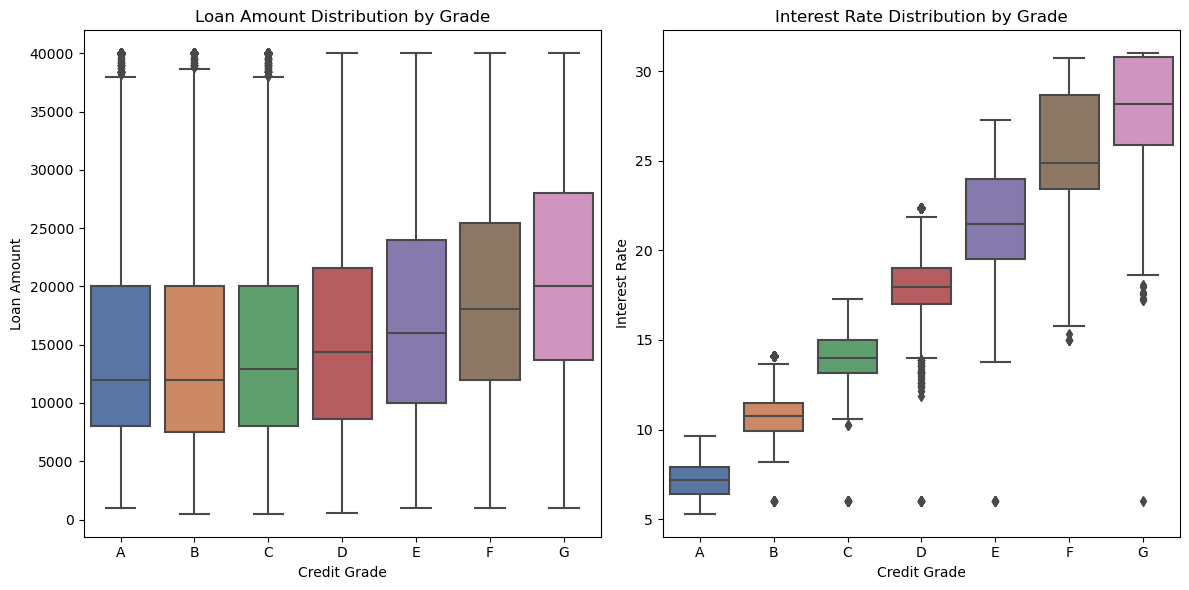

In [18]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='grade', y='loan_amnt', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], palette='deep')
plt.title('Loan Amount Distribution by Grade')
plt.xlabel('Credit Grade')
plt.ylabel('Loan Amount')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='grade', y='int_rate', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], palette='deep')
plt.title('Interest Rate Distribution by Grade')
plt.xlabel('Credit Grade')
plt.ylabel('Interest Rate')

plt.tight_layout()
plt.show()

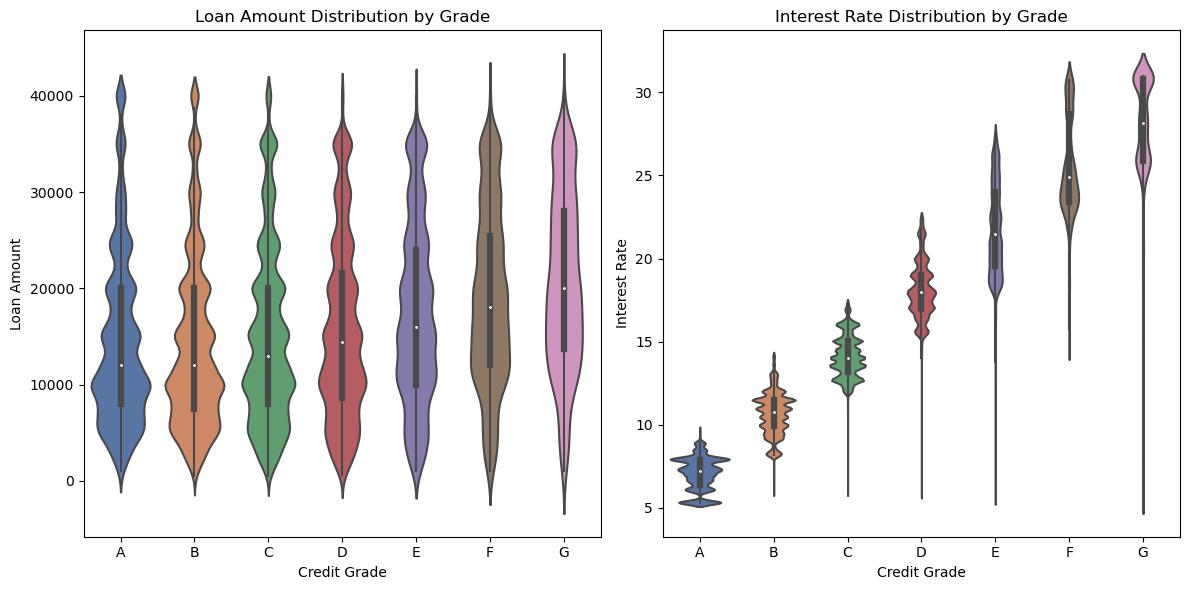

In [19]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(data=df, x='grade', y='loan_amnt', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], palette='deep')
plt.title('Loan Amount Distribution by Grade')
plt.xlabel('Credit Grade')
plt.ylabel('Loan Amount')

plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='grade', y='int_rate', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], palette='deep')
plt.title('Interest Rate Distribution by Grade')
plt.xlabel('Credit Grade')
plt.ylabel('Interest Rate')

plt.tight_layout()
plt.show()

The visualizations show that as the credit rating decreases from A to G, we observe a trend of increasing average loan amounts, indicating that borrowers with lower credit ratings tend to take larger loans. 

Additionally, there is a substantial increase in interest rates for loans as the credit grade decreases from A to G, reflecting the higher perceived risk associated with lending to borrowers with lower credit ratings.

In terms of loan amount distribution by grade, Grades A-C exhibit similar loan amounts, suggesting that borrowers within these higher credit ratings have comparable borrowing patterns. 

However, a noticeable shift in loan amounts begins at Grade D, indicating a divergence in borrowing patterns for those with lower credit ratings (Grades D-G).

### Exercise 7 - Sample splitting

Before estimating the **logistic regression** and other models, we are required to split the sample in *training* vs *testing* observations. We are asked to consider **70%** of the total data as training sample and the remaining as testing period. 

As we are dealing with a binary target variable we are asked to **balance out** the splitting accordingly. 

The variables we want to use for forecasting are listed as:

- Loan amount (**loan_amnt**)
- Interest rate (**int_rate**)
- Annual income (**annual_inc**)
- Total mortgage payment (**total_pymnt**)
- Mortgage installment (**installment**)
- Total paied in interest rates (**total_rec_int**)
- Last payment amount (**last_pymnt_amnt**)

The variable of interest to us is the binary variable **loan_dummy**. 

In [20]:
from sklearn.model_selection import train_test_split

# Select the dummy data as the dependent variable.
y = df_cleaned['loan_dummy']

# Set the given set of predictors as independent variables.
X = df_cleaned[['loan_amnt', 'int_rate', 'annual_inc', 'total_pymnt', 'installment', 'total_rec_int', 'last_pymnt_amnt']]

# Split the data into 70:30 into trainig and testing sets, as specified.
# Use stratifying on the dependent variable to balance out the splitting accordingly.
# Random state 42, always 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [21]:
# Let's check that the splitting has worked as intended by
# checking the distribution of the binary target variable.

# Creating a general function to return the distribution of unique values.
def class_distribution(y):
    count = y.value_counts(normalize=True) * 100
    return count

# Calculate the class distribution in the original dataset, training set, and testing set
original_dist = class_distribution(y)
train_dist = class_distribution(y_train)
test_dist = class_distribution(y_test)

# Display the class distributions
print("Original dataset class distribution:\n", original_dist)
print("\n")
print("Training set class distribution:\n", train_dist)
print("\n")
print("Testing set class distribution:\n", test_dist)

Original dataset class distribution:
 0    88.45361
1    11.54639
Name: loan_dummy, dtype: float64


Training set class distribution:
 0    88.453834
1    11.546166
Name: loan_dummy, dtype: float64


Testing set class distribution:
 0    88.453088
1    11.546912
Name: loan_dummy, dtype: float64


Our splitting seems to work as intended with the distribution of the binary data stable across all three classes of data splits.

### Exercise 8 - Estimating a logistic regression

We are now asked to estimate a logistic regression without shrinking the parameters. We need to ensure to estimate the regression using the training set of observations.

In [22]:
from sklearn.linear_model import LogisticRegression

# Training a logistic regression model withoug shrinking the parameters.
logit = LogisticRegression(max_iter=1e5, fit_intercept = False).fit(X_train, y_train)

### Exercise 9 - Produce forecast probabilities

We are asked to produce forecasts based on the observations in the testing sample. 

In [24]:
# Generate the predicted probabilities from the decision tree.
logit_probs = logit.predict_proba(X_test)[:, 1]
logit_probs

array([2.81286510e-08, 3.41611352e-01, 1.54858865e-01, ...,
       4.18700758e-02, 7.08416979e-02, 2.96382976e-01])

### Exercise 10a - Confusion matrix

And to calculate the confusion matrix for the logistic regression classifier.

In [25]:
# Use the logistic regression model to compute predictions on the test data.
yhat  = logit.predict(X_test)

# Confusion matrix.
from sklearn import metrics
print(metrics.confusion_matrix(y_test, yhat))

[[59739   249]
 [ 7724   107]]


The confusion matrix for the logistic regression model shows that the classifier is good at identifying the **true negatives** (59739 identified), the mortgages that do not default. However, it has a low number of true positives (107 identified), which indicates that the model struggles to identify mortgages that will default.

In the context of risk assessment for LendingClub, the model may not be ideal as it has a high number of false negatives (7724 identified) meaning that the model tends to miss many instances of actual defaults. As such using this model to identify defaults could lead to LendingClub underestimating the risk which could cause potential losses.

In terms of accuracy the model scores around 89.5%, meaning that this model predicts the outcome correctly 89.5% of the time.

### Exercise 10b - Forecast from a "no-skill" predictor

We are now asked to calculate the forecast from a "no-skill" prediction, that is, we always predict the majority  class. 

In [26]:
# Generate a no skill prediction (majority class).
# This forecast will always predict 0, which is the majority class.
ns_probs = [0 for _ in range(len(y_test))]

### Exercise 10c - Compare forecasted probability

We are now asked to compare the logistic regression with the "no-skill" prediction based on the ROC curve.

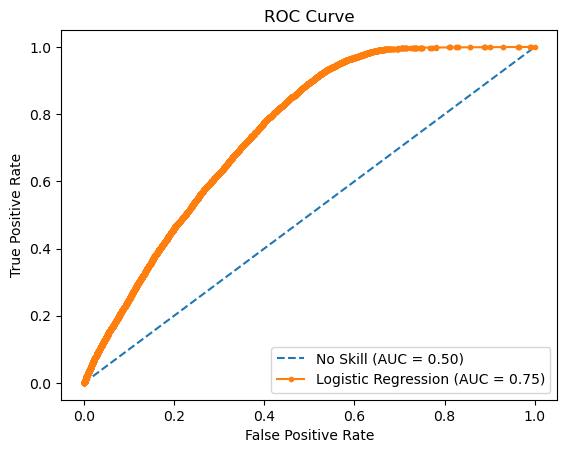

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score


# Calculate the ROC curve and ROC AUC scores for the no-skill prediction.
ns_auc = roc_auc_score(y_test, ns_probs)

# Same for logistic regression model.
logit_auc = roc_auc_score(y_test, logit_probs)

# Calculate the ROC curve coordinates.
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
logit_fpr, logit_tpr, _ = roc_curve(y_test, logit_probs)

# Plot the ROC curve
plt.plot(ns_fpr, ns_tpr, linestyle='--', label=f'No Skill (AUC = {ns_auc:.2f})')
plt.plot(logit_fpr, logit_tpr, marker='.', label=f'Logistic Regression (AUC = {logit_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.title('ROC Curve')
plt.show()

We find that the "No Skill" predictor has an AUC metric of 0.50 which is as expected. 

The AUC metric for the logistic regression classifier is 0.75 which indicates that it is performing significantly better than the random classifier.

We see that the ROC curve exhibits a curvature towards the top-right corner which indicates that there is a less than desirable trade-off between the True Positive and False Positive rate.

Meaning that despite correctly identifying a significant portion of positive instances it also suffers from Type 1 error where it incorrectly predicts negative instances as positive.

This behaviour is reflected in the AUC value of 0.75 calculated for the logistic regression model.

### Exercise 11 - Estimating a simple classification tree

We are now required to implement a classification tree to forecast mortgage defaults. We implement two different procedures. 

- 1. Classification tree with **max_depth** fixed
- 2. Classificarion tree with **max_depth** estimated by k-fold cross validation.

Let's begin with the simple classification tree with fixed max_depth.

In [29]:
from sklearn.tree import DecisionTreeClassifier

# Creating a decision tree classifier with a fixed max_depth of 5.
# 5 is selected as it is within the range of given parameters in the following exercises.
max_depth = 5

# Set the parameters of the Decision Tree.
dt_classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

# Training the classifier on the training data.
dt_classifier.fit(X_train, y_train)

# Make predictions on the testing data.
y_pred = dt_classifier.predict(X_test)

# Generate the predicted probabilities from the decision tree.
dt_probs = dt_classifier.predict_proba(X_test)[:, 1]
dt_probs

array([0.00053049, 0.25735925, 0.10217391, ..., 0.00497336, 0.08337659,
       0.16381903])

Before we move on with the next exercise let's calculate a **confusion matrix** for the **simple classification tree classifier**.

In [31]:
# Confusion matrix for simple classification tree model.
print(metrics.confusion_matrix(y_test, y_pred))

[[59960    28]
 [ 7796    35]]


Compared to the logistic regression classifier we find that the simple classification tree is superior at identifying true negative cases (59960 compared to 59739) and significantly better at reducing the number of false positive predictions (28 compared to 249).

However, the model performs poorly in identifying true positive cases being only able to predict 35 cases correctly, while misclassifying 7796 as false negatives (predicted as non-defaulters). Under the classification tree a vast majority of actual defaulters go undetected which is a significant concern for LendersClub who's goal is to minimize risk and ensure profits. 

### Exercise 12 - Compare classification tree against other models

We now compare the classification tree against the logistic regression and the "no-skill" prediction estimated above based on the ROC curve.

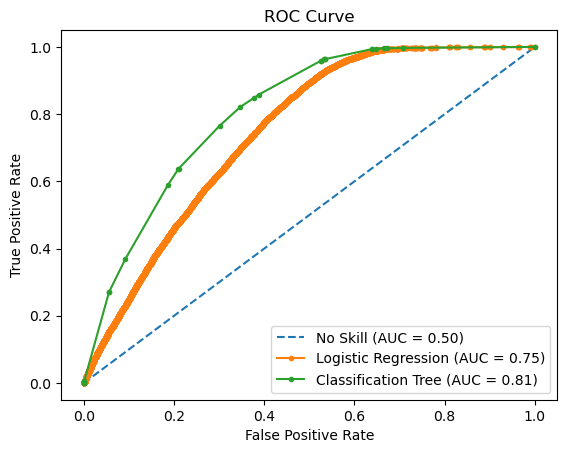

In [30]:
# Calculate the ROC AUC scores for the no-skill prediction, logistic regression, and classification tree
ns_auc = roc_auc_score(y_test, ns_probs)
logit_auc = roc_auc_score(y_test, logit_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

# Calculate the ROC curve coordinates for plotting
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
logit_fpr, logit_tpr, _ = roc_curve(y_test, logit_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

# Plot the ROC curve
plt.plot(ns_fpr, ns_tpr, linestyle='--', label=f'No Skill (AUC = {ns_auc:.2f})')
plt.plot(logit_fpr, logit_tpr, marker='.', label=f'Logistic Regression (AUC = {logit_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, marker='.', label=f'Classification Tree (AUC = {dt_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.title('ROC Curve')
plt.show()

The ROC curve for the simple classification tree with fixed max_depth demonstrates superior performance compared to the logistic regression and "no-skill" model. We see that the classification model exhibits curvature peaked closer to the top-left corner, which indicated a higher true positive rate and lower false positive rate in comparison to the logistic regression model.

The AUC score of 0.81 for the classification tree also support these findings. 

In summary we see evidence that the simple classification tree model is more effective at correctly distinguishing between positive and negative classes. 

Based solely on the ROC curve and AUC scores the simple classification tree could be argued to be the better model for LenderClub.

However, knowing LendersClub priority to minimize risk the final model we propose to the company should be one which minimizes false negatives (missed defaulters) over minimizing false positives (missed non-defaulters).

### Exercise 13 - Cross-validated classification tree

We are now asked to re-calculate a classification tree but with the **max_depth** and the **min_samples_leaf** parameters estimated by a 5-fold cross-validation method.

In [36]:
# Supress warnings.
import warnings
warnings.filterwarnings("ignore")

In [37]:
from sklearn.model_selection import GridSearchCV

# The provided parameter grid.
params_dt = {'max_depth': [2, 3, 4, 6],
             'min_samples_leaf': [1, 1.5, 2]}

# In class example files use an accuracy score for grid search.
# I was curious to see if there would be a major difference in the best
# validated model if we searched based on ROC AUC scoring.


# Let's define a function for performing grid search and evaluation on accuracy and ROC AUC scoring.
def perform_grid_search(scoring):
    grid_search = GridSearchCV(dt_classifier, params_dt, cv=5, scoring=scoring, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters.
    best_params = grid_search.best_params_
    # Get the best decision tree.
    best_dt_classifier = grid_search.best_estimator_
    
    # Make predictions on the test dataset.
    y_pred = best_dt_classifier.predict(X_test)
    y_probs = best_dt_classifier.predict_proba(X_test)[:, 1]

    # Calculate accuracy and ROC AUC scores.
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_probs)

    return best_params, accuracy, roc_auc, best_dt_classifier

# Perform grid search and evaluation with accuracy as the scoring metric.
best_params_accuracy, accuracy_accuracy, roc_auc_accuracy, best_dt_classifier = perform_grid_search('accuracy')

# Perform grid search and evaluation with ROC AUC as the scoring metric.
best_params_roc_auc, accuracy_roc_auc, roc_auc_roc_auc, best_dt_classifier = perform_grid_search('roc_auc')


# Print the best parameters and accuracy and ROC AUC scores for both trees.
print(f"Best parameters (accuracy): {best_params_accuracy}")
print(f"Accuracy (accuracy): {accuracy_accuracy:.2f}")
print(f"ROC AUC (accuracy): {roc_auc_accuracy:.2f}")
print("\n")
print(f"Best parameters (ROC AUC): {best_params_roc_auc}")
print(f"Accuracy (ROC AUC): {accuracy_roc_auc:.2f}")
print(f"ROC AUC (ROC AUC): {roc_auc_roc_auc:.2f}")

Best parameters (accuracy): {'max_depth': 6, 'min_samples_leaf': 2}
Accuracy (accuracy): 0.88
ROC AUC (accuracy): 0.82


Best parameters (ROC AUC): {'max_depth': 6, 'min_samples_leaf': 2}
Accuracy (ROC AUC): 0.88
ROC AUC (ROC AUC): 0.82


In [38]:
# View the best decision tree classifier.
print(best_dt_classifier)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, random_state=42)


Before we move forward lets again calculate a confusion matrix for the cross-validated classification tree model.

In [39]:
# Generate decision tree prediction probabilities with cross-validation.
best_dt_classifier.fit(X_train, y_train)
cv_dt_yhat = best_dt_classifier.predict(X_test)
cv_dt_probs = best_dt_classifier.predict_proba(X_test)[:, 1]

# Confusion matrix for cross-validated classification tree model.
print(metrics.confusion_matrix(y_test, cv_dt_yhat))

[[59961    27]
 [ 7794    37]]


We find that compared to the simple classification tree model the cross-validated model performs slightly better in terms of both predictions in true positives and true negatives. It should be noted that the performance is very small and considering the classification cost for minimizing false negatives being unequal the model still may not be sufficient for the needs of LendersClub.

### Exercise 14 - Compare the CV-Classification tree with other models.

Now we are asked to compare the classification tree with and without cross validation against the logistic regression and the "no-skill" prediction estimated above based on the ROC curve.

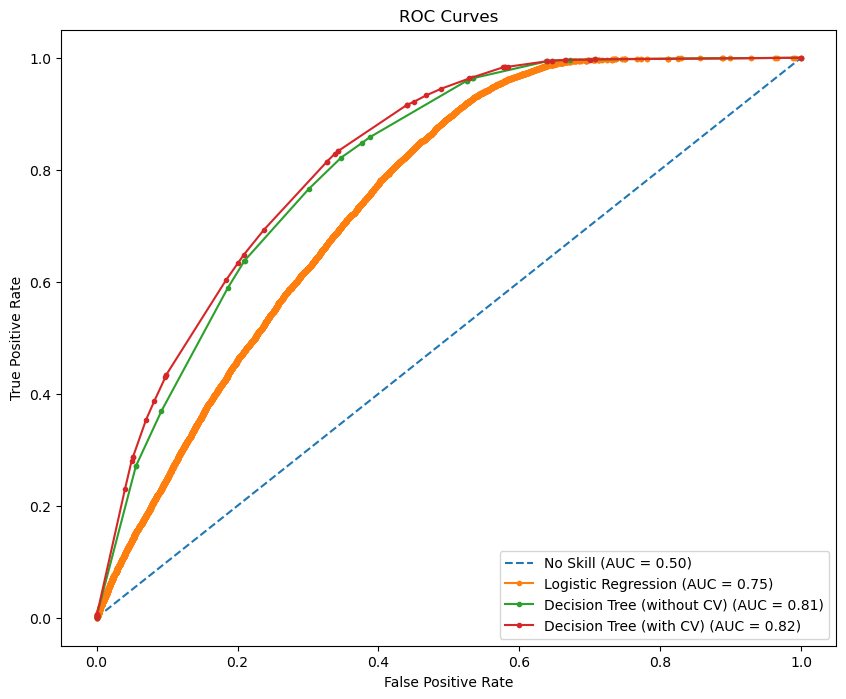

In [40]:
# Calculate the ROC AUC scores for the cross-validated decision tree.
cv_dt_auc = roc_auc_score(y_test, cv_dt_probs)

# Calculate ROC curves for each model.
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
logit_fpr, logit_tpr, _ = roc_curve(y_test, logit_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
cv_dt_fpr, cv_dt_tpr, _ = roc_curve(y_test, cv_dt_probs)

# Plot the ROC curves.
plt.figure(figsize=(10, 8))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label=f'No Skill (AUC = {ns_auc:.2f})')
plt.plot(logit_fpr, logit_tpr, marker='.', label=f'Logistic Regression (AUC = {logit_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, marker='.', label=f'Decision Tree (without CV) (AUC = {dt_auc:.2f})')
plt.plot(cv_dt_fpr, cv_dt_tpr, marker='.', label=f'Decision Tree (with CV) (AUC = {cv_dt_auc:.2f})')

# Set axis labels, legend and title.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curves')

# Display the plot.
plt.show()

In terms of both AUC metric and ROC curve the cross-validated classification tree performs slightly better than the simple tree, although the improvement in performance could be argued as marginal. Based on only the metrics obtained from an ROC curve and AUC score the cross-validated classification tree should be selected as the superior model. However, because of the unequal classification cost this may not be the case in actual practice. The performance of the cross-validated tree could be improved if we are to modify the provided parameters and increase the maximum tree depth and minimum leaf size.

### Exercise 15 - Estimating a random forest 

Exercise 15 requires us to expand the set of models and include a random forest. The goal is to see if a more robust framework allows to have a more precise idea of the mortgage probability of default. We are asked to assume the number of estimators (**n_estimators**) equal to 10.

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Creating a Random Forest classifier with n_estimators = 10.
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

# Training the classifier on the training data.
rf_classifier.fit(X_train, y_train)

rf_yhat = rf_classifier.predict(X_test)

Once again before we move forward let's calculate the confusion matrix for the random forest classifier.

In [43]:
# Confusion matrix for random forest model.
print(metrics.confusion_matrix(y_test, rf_yhat))

[[59450   538]
 [ 4064  3767]]


The Random Forest model performs better than the cross-validated classification tree model in terms of identifying default cases (higher TP, lower FN), while it misclassifies more non-default cases as defaults (lower TN, higher FP).

By having fewer false negatives and more true positives, the random forest model identifies more borrowers who are likely to default, allowing lenders to avoid extending credit to high-risk borrowers. 

On the other hand, it also has far more false positives (538 compared to 27), meaning it might reject some borrowers who would actually pay back their loans. 

To pick a model best suited for LendersClubs needs it's important to strike a balance between the number of false negatives (lending to borrowers who are likely to default) and false positives (lending to borrowers who are likely to pay back their loans).

Selecting the correctly threshold for this trade-off ultimately comes down to whether the cost of a borrower defaulting is higher than the cost of rejecting a borrower who would repay their loan.

### Exercise 16 - Compare random forest against other models.

Now we are asked to compare the random forest against the classification tree, with and without cross validation, the logistic regression and the "no-skill" prediction estimated above based on the ROC curve.

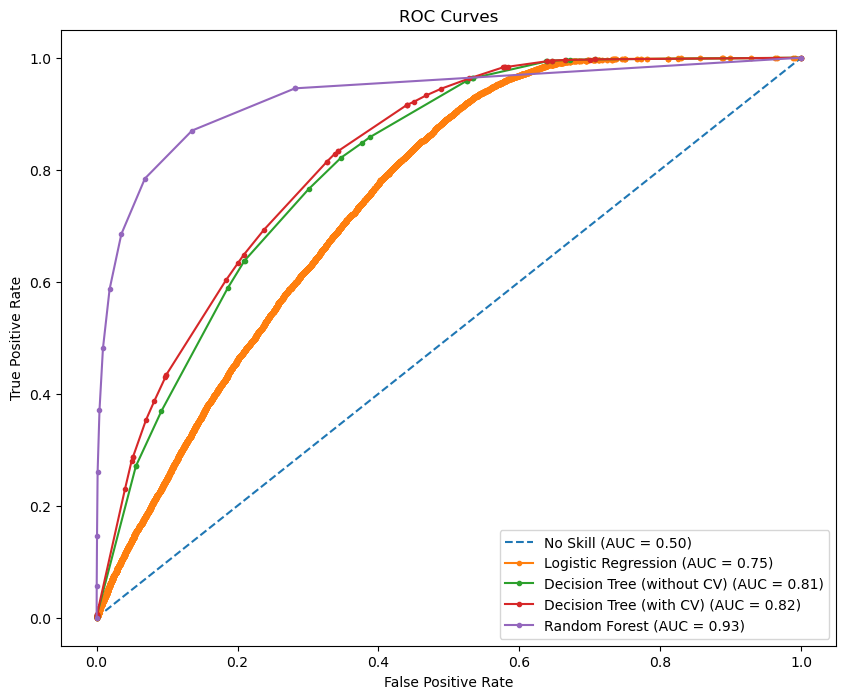

In [44]:
# Generate the predicted probabilities from the Random Forest model.
rf_probs = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC scores for the cross-validated decision tree.
rf_auc = roc_auc_score(y_test, rf_probs)

# Calculate ROC curves for each model.
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
logit_fpr, logit_tpr, _ = roc_curve(y_test, logit_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
cv_dt_fpr, cv_dt_tpr, _ = roc_curve(y_test, cv_dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# Plot the ROC curves.
plt.figure(figsize=(10, 8))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label=f'No Skill (AUC = {ns_auc:.2f})')
plt.plot(logit_fpr, logit_tpr, marker='.', label=f'Logistic Regression (AUC = {logit_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, marker='.', label=f'Decision Tree (without CV) (AUC = {dt_auc:.2f})')
plt.plot(cv_dt_fpr, cv_dt_tpr, marker='.', label=f'Decision Tree (with CV) (AUC = {cv_dt_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, marker='.', label=f'Random Forest (AUC = {rf_auc:.2f})')

# Set axis labels,legend and title.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curves')

# Display the plot.
plt.show()

The plot demonstrates that the random forest model has a high true positive rate and relatively low false positive rate, as evident by the curves peak being closer to the top-left corner. Meaning it performs higher in terms of sensitivity (true-positive rate) and specificity (proportion of actual defaulters) as evident by the significantly higher AUC score.

Based solely on the ROC curve and AUC score the random forest model far out-performs the other models.

### Exercise 17 - Relative importance of each predictor.

We are now required to look at the relative importance of each of the predictors used based on a *permutation importance* algorithm.

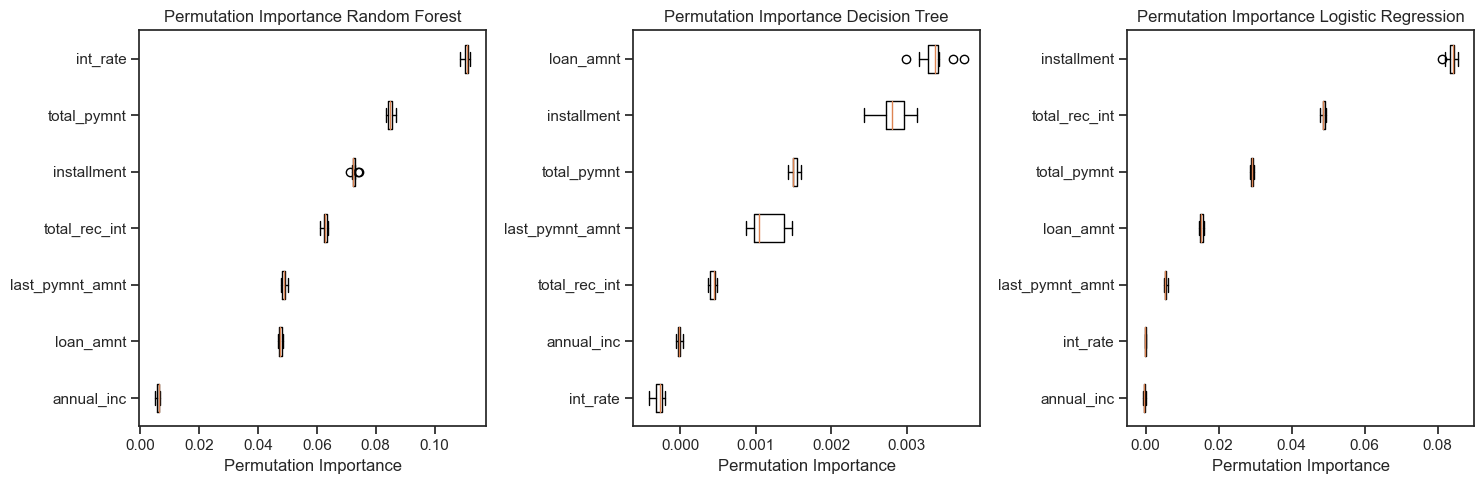

In [65]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Compute the permutation importances for the Random Forest classifier.
result_rf = permutation_importance(rf_classifier, X_test, y_test, n_repeats=10, random_state=42)
# Get the importance scores and their indices sorted by importance.
sorted_idx_rf = result_rf.importances_mean.argsort()

# Compute the permutation importances for the Decision Tree classifier.
result_dt = permutation_importance(best_dt_classifier, X_test, y_test, n_repeats=10, random_state=42)
# Get the importance scores and their indices sorted by importance.
sorted_idx_dt = result_dt.importances_mean.argsort()

# Compute the permutation importances for the Logistic Regression classifier.
result_lr = permutation_importance(logit, X_test, y_test, n_repeats=10, random_state=42)
# Get the importance scores and their indices sorted by importance.
sorted_idx_lr = result_lr.importances_mean.argsort()

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# Plot the feature importances for Random Forest.
axs[0].boxplot(result_rf.importances[sorted_idx_rf].T, vert=False, labels=X_test.columns[sorted_idx_rf])
axs[0].set_yticks(range(1, len(X_test.columns) + 1))
axs[0].set_yticklabels(X_test.columns[sorted_idx_rf])
axs[0].set_xlabel('Permutation Importance')
axs[0].set_title('Permutation Importance Random Forest')

# Plot the feature importances for Decision Tree.
axs[1].boxplot(result_dt.importances[sorted_idx_dt].T, vert=False, labels=X_test.columns[sorted_idx_dt])
axs[1].set_yticks(range(1, len(X_test.columns) + 1))
axs[1].set_yticklabels(X_test.columns[sorted_idx_dt])
axs[1].set_xlabel('Permutation Importance')
axs[1].set_title('Permutation Importance Decision Tree')

# Plot the feature importances for Logistic Regression.
axs[2].boxplot(result_lr.importances[sorted_idx_lr].T, vert=False, labels=X_test.columns[sorted_idx_lr])
axs[2].set_yticks(range(1, len(X_test.columns) + 1))
axs[2].set_yticklabels(X_test.columns[sorted_idx_lr])
axs[2].set_xlabel('Permutation Importance')
axs[2].set_title('Permutation Importance Logistic Regression')


plt.tight_layout()
plt.show()


The plots above reveal that for the Random Forest model the interest rate (int_rate) variable is the most significant predictor, with a permutation importance close to 0.11. This suggests that the interest rate plays a crucial role in determining the outcome of the model. And if we shuffle the values of the variable int_rate the performance of the model will deteriorate more so than it would if we were to shuffle the order of the other variables.

The second most important predictor is the total payment (total_pymnt), with a permutation importance of around 0.082, highlighting its considerable influence on the model as well. 

On the other hand, the annual income (annual_inc) appears to be the least important predictor, with a relatively low permutation importance of around 0.005, indicating that it has a minor impact on the model's prediction.

This is in stark contrast to the permutation importance of the decision tree where int_rate has a negative permutation importance, which may mean that the performance of the model actually improved when the values in the variable were shuffled.

However, as the negative value is extremely close to zero it could be safer to assume that the int_rate variable is not a contributing factor to the models predictive power.

Based on our findings we may want to retrain the models, with the exclusion of variables that scored poorly based on the permutation importance analysis to investigate whether we are able to improve the predictive power of the models.

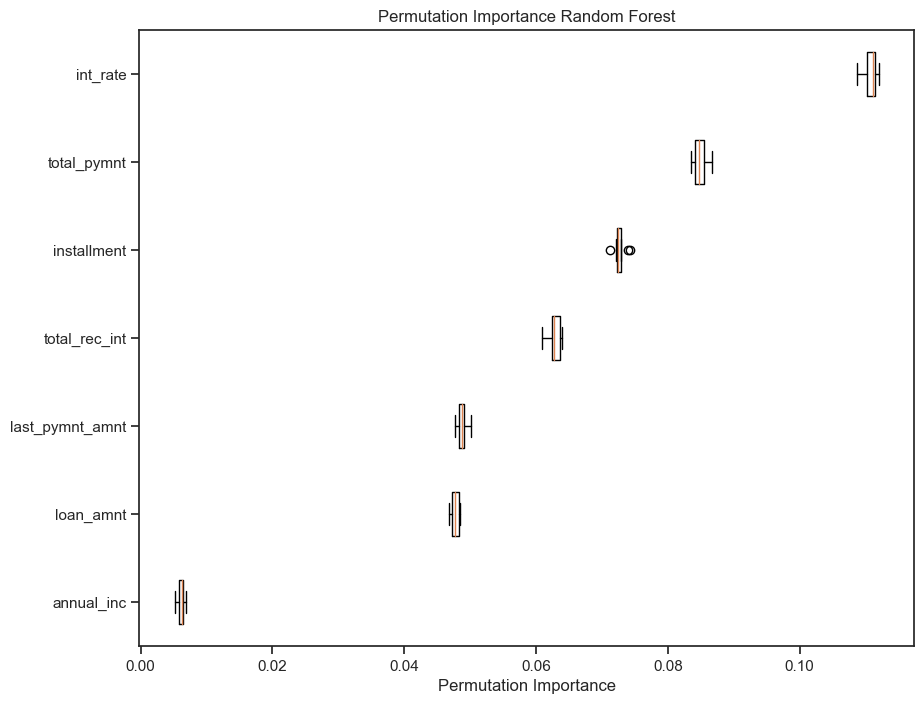

In [63]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Compute the permutation importances for the Random Forest classifier.
result = permutation_importance(rf_classifier, X_test, y_test, n_repeats=10, random_state=42)

# Get the importance scores and their indices sorted by importance.
sorted_idx = result.importances_mean.argsort()

# Plot the feature importances as a boxplot.
plt.figure(figsize=(10, 8))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance Random Forest')
plt.show()
